 Quick Demo for Relative Path:

* Starting with ``/`` returns to the root directory and starts there

* Starting with ``../`` moves one directory backward and starts there

* Starting with ``../../`` moves two directories backward and starts there (and so on...)

To move forward, just start with the first sub directory and keep moving forward.

In [1]:
import os
# get current file location
path = os.getcwd()
path = os.path.abspath(os.path.dirname('..'))
# path

In [2]:
# go back the upper level
path = os.path.abspath(os.path.dirname(os.path.dirname('__file__')))
path = os.path.abspath(os.path.dirname(os.getcwd()))
path = os.path.abspath(os.path.join(os.getcwd(), ".."))
# path

In [3]:
# go two level backward 
path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
# path

----
# Project: AltData_SQL

This notebook contains a project where I used SQL, Regular Expression and sklearn to explore a real-world Alternative Dataset.

# Import Data:

In [2]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

#!pip install -U pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

path = os.path.abspath(os.path.dirname('..'))
RELATIVE_PATH_1 = os.path.join(path,'Alternative_Data_Analysis','AltData_Part_One_SQL','alt_data_hw1_prt1_enrgz.csv')
RELATIVE_PATH_2 = os.path.join(path,'Alternative_Data_Analysis','AltData_Part_One_SQL','alt_data_hw1_prt2_all_trans_500k.csv')
p2_df = pd.read_csv(RELATIVE_PATH_2).dropna(0)
p2_df

,DATE_KEY,STORE,PRICE_PAID,QTY,DESCRIPTION,DEPARTMENT,CATEGORY
0,20170214.0,ff869707c585427f5a1150e6acdbb2edfff045d3,1.67,1.0,HERB-OX CHKN BOUIL GRAN,GROCERY,SOUP DRY/BOUILLON
1,20170214.0,231ffad690bd3aa5f2c81f303e9c2adda57dba2a,2.50,1.0,NAB BELVITA BLUEBERRY,GROCERY,COOKIES
2,20170214.0,338c90a92703191138bd6e44224f3335ff7ef6a0,3.00,1.0,RAISN BRAN CRUNCH,GROCERY,CEREAL RTE
3,20170214.0,e87d15f4c44f276f7834f14d944386082dd46238,1.00,2.0,CAMP HOME STYLE CHIX ND,GROCERY,SOUP CONDENSED
4,20170214.0,85e200307626f18773d40795f4e2c266003a16b4,2.00,4.0,CRYS LT GRN TEA PCH MNG,GROCERY,DRINK MIX/POWDERED
...,...,...,...,...,...,...,...
499994,20170214.0,38642bdb5c115dd3ee4d73fe74e0ff273f1a3a10,1.89,1.0,DASANI 20OZ SINGLE,GROCERY,WATER DRINKING
499995,20170214.0,79a44bf7e5c526cb1ebe00a740eb9cdc3c2ffe8b,15.49,1.0,MICH ULTRA 18 PK LN,ALCOHOL,BEER
499996,20170214.0,1bfe822b6c4d42c0b8cde70327cbd57ea1427fee,3.29,1.0,HIGH LIFE 12PK CAN,ALCOHOL,BEER
499997,20170214.0,5d6b7b902c7eaa05540e6e0dacc01c93c1bdc06d,0.50,1.0,SMARTFOOD,GROCERY,SNACKS CHIPS


------
# Dataset description:

Here, our client is a retail corporation that operates a chain of grocery stores in the US (similar with Walmart). And they have a bunch of stores selling various products in different categories/departments. 

This dataset contains all the transactions happened in their stores on Feb. 14, 2017. 

7 Columns, ~500k Rows:

- `DATE_KEY`: Feb 14, 2017
- `STORE`: unique id for each store
- `PRICE_PAID`: price per product
- `QTY`: number of transactions for that store and that product
- `DESCRIPTION`: unique description for that product
- `DEPARTMENT`: which department the product belongs to
- `CATEGORY`: which category the product belongs to




------
# SQL Analysis:

## The following questions are our concerns:

1. How many stores we have in this dataset?
2. How many unique products were sold among all of our stores on Feb. 14, 2017?
3. Which 10 products are the top 10 in terms of the percentage of total transactions?
4. Which 10 products are the top 10 in terms of the number of stores sold it? (For each products, count the occurence of it.)
5. Which 10 products are the top 10 in terms of sales volume (price * qty) among all the stores?
6. For each store, which 10 products are the top 10 in terms of sales volume?


### For question 1 and 2:

In [5]:
q_1 = '''
SELECT COUNT(DISTINCT STORE) as Count_Stores
FROM p2_df
'''
pysqldf(q_1).head()

,Count_Stores
0,982


In [6]:
q_2 = '''
SELECT COUNT(DISTINCT Description) as Count_Descriptions
FROM p2_df
'''
pysqldf(q_2)

,Count_Descriptions
0,8569


### For question 3 and 4:

In [7]:
q_3 = '''
SELECT Description, 
    (SELECT SUM(Qty) FROM p2_df) as Total_Trans, 
    SUM(Qty) as Product_Trans_Qty, 
    ((SUM(Qty))/(SELECT SUM(Qty) FROM p2_df)) * 100 as Ptg
FROM p2_df
GROUP BY Description
ORDER BY Ptg DESC
'''
pysqldf(q_3).head(10)

,DESCRIPTION,Total_Trans,Product_Trans_Qty,Ptg
0,COKE CLASSIC 500ML 6PK,665959.0,8085.0,1.214039
1,LIBBY CUT GRN BEANS,665959.0,6709.0,1.007419
2,LIBBY WHL KERN SWT CORN,665959.0,6703.0,1.006518
3,COKE DT 500ML 6PK,665959.0,4267.0,0.640730
4,TOWNHOUSE MINIMEALS SEASLT HUM,665959.0,3321.0,0.498679
5,LIBBY FR STYL GRN BEANS,665959.0,3308.0,0.496727
6,LIBBY SWT PEAS,665959.0,3290.0,0.494024
7,COKE CLASSIC 20 OZ,665959.0,3012.0,0.452280
8,CHEETOS JUMBO PUFFS,665959.0,2935.0,0.440718
9,LIBBY CRM STYL SWT CORN,665959.0,2900.0,0.435462


In [8]:
q_4 = '''
SELECT Description as Description, 
        ((SUM(Qty))/(SELECT SUM(Qty) FROM p2_df)) * 100 as Trans_Ptg,
        COUNT (Description) as Occurance
FROM p2_df
GROUP BY Description
ORDER BY occurance DESC
'''
pysqldf(q_4).head(10)

,Description,Trans_Ptg,Occurance
0,COKE CLASSIC 20 OZ,0.452280,2759
1,TOWNHOUSE MINIMEALS SEASLT HUM,0.498679,2565
2,COKE CLASSIC 500ML 6PK,1.214039,2461
3,LAYS CLASSIC,0.426753,2390
4,KRAFT DRSNG 1000 ISLAND,0.348820,2184
5,LIBBY WHL KERN SWT CORN,1.006518,2119
6,CHEETOS JUMBO PUFFS,0.440718,2010
7,BOUNTY BIG 2RL SAS WHT 84CT,0.314284,1985
8,LIBBY CUT GRN BEANS,1.007419,1918
9,CHEETOS CRUNCHY,0.407232,1877


### For question 5 and 6:

Select the top 10 product descriptions by sales volume (price*quantity) per store
        
        1. Columns
            a. Store (StoreID)
            b. Description
            c. Total Sales Volume
        
        2. Rows: For each unique store ID, there should be 10 rows of 
        descriptions or the max number of unique descriptions that the store 
        has in the file if the max is less than 10

In [9]:
# rank all the sales volume
q_5 = '''
SELECT Store AS Store, 
        Description AS Description,
        SUM(QTY) AS Trans_Qty,
        Price_Paid AS Single_Price,
        SUM(QTY) * Price_Paid As Sales_Volume
FROM p2_df
GROUP BY Store, Description
ORDER BY Store, Sales_Volume DESC
'''
pysqldf(q_5).head(10)

,Store,Description,Trans_Qty,Single_Price,Sales_Volume
0,105d2d9dd58f37a447d362d466c9d8cae32a88ba,SMIRNOFF 80PR,3.0,17.99,53.97
1,105d2d9dd58f37a447d362d466c9d8cae32a88ba,SEAGRAM CROWN ROYAL,1.0,39.99,39.99
2,105d2d9dd58f37a447d362d466c9d8cae32a88ba,TANQUERAY GIN94.6 PRF,1.0,30.99,30.99
3,105d2d9dd58f37a447d362d466c9d8cae32a88ba,RUMPLEMINZ PEP SCHNP100,1.0,25.99,25.99
4,105d2d9dd58f37a447d362d466c9d8cae32a88ba,NATURAL LIGHT 18PK,2.0,12.99,25.98
5,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CROWN ROYAL REGAL APPLE,1.0,20.99,20.99
6,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CROWN ROYAL,1.0,20.99,20.99
7,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CROWN HARVEST RYE,1.0,20.99,20.99
8,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CAPTMORGAN RUM,1.0,20.99,20.99
9,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CAPTAIN MORGAN WHITE,1.0,20.99,20.99


In [10]:
# FOR EACH STORE, the top 10 products are.
q_6 = '''

SELECT *
FROM (

    SELECT *, 
        RANK() OVER (PARTITION BY StoreID ORDER BY Total_Sales_Volume DESC) as rank
    FROM(
        SELECT Store as StoreID, 
                Description as Description,
                SUM(QTY) * Price_Paid as Total_Sales_Volume
        FROM p2_df
        GROUP BY Description, StoreID
        ORDER BY StoreID
        )
        
    )
WHERE rank <=10
'''
pysqldf(q_6).head(30)

,StoreID,Description,Total_Sales_Volume,rank
0,105d2d9dd58f37a447d362d466c9d8cae32a88ba,SMIRNOFF 80PR,53.97,1
1,105d2d9dd58f37a447d362d466c9d8cae32a88ba,SEAGRAM CROWN ROYAL,39.99,2
2,105d2d9dd58f37a447d362d466c9d8cae32a88ba,TANQUERAY GIN94.6 PRF,30.99,3
3,105d2d9dd58f37a447d362d466c9d8cae32a88ba,RUMPLEMINZ PEP SCHNP100,25.99,4
4,105d2d9dd58f37a447d362d466c9d8cae32a88ba,NATURAL LIGHT 18PK,25.98,5
5,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CAPTAIN MORGAN WHITE,20.99,6
6,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CAPTMORGAN RUM,20.99,6
7,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CROWN HARVEST RYE,20.99,6
8,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CROWN ROYAL,20.99,6
9,105d2d9dd58f37a447d362d466c9d8cae32a88ba,CROWN ROYAL REGAL APPLE,20.99,6


----------------
# Regular Expressions

### We want to find product transactions that look like ***Energizer***.

Firstly, I devise one regular expression on the smaller dataset in file1 called `df_enrgz` since it is simple to check the results: we can easily count that there are 30 / 33 unique descriptions in the file1 look like Energizer transactions. 

Then, I modified the regular expression so that it can correctly capture all the energizers-like transactions in our larger dataset called `df_all` which contains about 500k products.

Simple procedure:

- Firstly, look at the data from original csv file
- Second, check out all the relevent product descriptions
- Third, determine the regular expression that can locate Energizers the most correctly
- Double check my results by [https://regex101.com/]


## Import Data:

In [11]:
import re
import pandas as pd
df_enrgz = pd.read_csv(RELATIVE_PATH_1).dropna(0)
df_all = pd.read_csv(RELATIVE_PATH_2).dropna(0)
#df_enrgz

## File 1:

I provide 2 solutions as below:

- `mypattern1` = '(EN.\S.+)'
- `mypattern2` = '(^EN[EGR]+[0-9a-zA-Z])'


Operating in LIST:

In [12]:
mylist = df_enrgz.DESCRIPTION.unique().tolist()
mystring = '\n'.join(mylist)
print('There are ',len(mylist),' unique drescriptions in the file.')

There are  33  unique drescriptions in the file.


In [13]:
mypattern1 = '(EN.\S.+)'
y = re.findall(mypattern1 ,mystring)
print("The number of unique Energizer product I found = ",len(y),"/",len(mylist))
print('----- Find all results: -----')
for item in y:
    print(item.replace('\n',''))

The number of unique Energizer product I found =  30 / 33
----- Find all results: -----
ENRGZ MAX AAA
ENRGZ BATTERY AAA
ENRGZ MAX AA
ENRGZ PHO LITH 3V 123A
ENER ECO ADVNC AA 4CT BATTERY
ENRGZ H/AID AZ10DP-8
ENERGIZER ULT LITH 9V
ENRGZ BATTERY AA
ENRGZ H/AID AZ13DP-8
ENRGZ H/AID AZ312DP-8
ENRGZ MAX AA E91MP-8
ENRGZ MAX AAA E92MP-8
ENER ALK E90 2PK
ENGZR N E90-1.5V
ENRGZ MAX 9V 522BP-2
ENRGZ 3V WTCH LITH 2025
ENRGZ RECHARGE 4CT AAA
ENGZR ZINC AIR AZ312DP
ENRGZ MAX D E95BP-4
ENRGZ 3V WTCH LITH 2016
ENGZR VALUE CHARGER
ENRGZ 8X ULT LITHIUM-AA
ENRGZ 6V LANTERN BAT
ENRGZ 3V CALC BAT 2450
ENGZR ZINC AIR AZ13DP
ENRGZ WATCH 392 NO MERC
ENRGZ RECHARGE 4CT AA
ENRGZ 3V WTCH LITH 2032
ENRGZ 4X ADV LITHIUM AA
ENRGZ 4X ADV LITHIUM-AA


Operating in pd.DataFrame:

In [14]:
df2 = df_enrgz.DESCRIPTION[df_enrgz.DESCRIPTION.unique()]
df_2 = pd.DataFrame(df2).reset_index().rename(columns={'index':'Description'}).drop(columns='DESCRIPTION')
# df_2

In [15]:
mypattern2 = '(^EN[EGR]+[0-9a-zA-Z])'
energizer_indices = []
for idx, row in df_2.iterrows():
    if re.search(mypattern2, row['Description']):
        energizer_indices.append(idx)
df_result = df_2.iloc[energizer_indices]
print(len(df_result.index),'/',len(df_2.index),' unique descriptions in the Part1 file look like Energizer transactions.')
df_result

30 / 33  unique descriptions in the Part1 file look like Energizer transactions.


,Description
0,ENRGZ MAX AAA
1,ENRGZ BATTERY AAA
2,ENRGZ MAX AA
3,ENRGZ PHO LITH 3V 123A
4,ENER ECO ADVNC AA 4CT BATTERY
5,ENRGZ H/AID AZ10DP-8
6,ENERGIZER ULT LITH 9V
7,ENRGZ BATTERY AA
8,ENRGZ H/AID AZ13DP-8
9,ENRGZ H/AID AZ312DP-8


## File 2:

Mannually make sure there are no false positives, i.e. only the real Energizer transactions (from Part1 file) are captured, but not any other ones.

I provide 3 solutions as below:

- `mypattern4` = '(\nEN[ERG].+)'

In [16]:
mylist2 = df_all.DESCRIPTION.unique().tolist()
mystring2 = '\n'.join(mylist2)

mypattern4 = '(\nEN[ERG].+)'

y2 = re.findall(mypattern4, mystring2)
print("The number of unique Energizer product I found = ",len(y2),"/",len(mylist2))
print('---- List all results: ----')
for it in y2:
    print(it.replace('\n',''))

The number of unique Energizer product I found =  22 / 8569
---- List all results: ----
ENRGZ BATTERY AAA
ENRGZ MAX AAA E92MP-8
ENRGZ MAX AAA
ENRGZ BATTERY AA
ENRGZ PHO LITH 3V 123A
ENRGZ MAX AA E91MP-8
ENRGZ MAX AA
ENRGZ H/AID AZ312DP-8
ENER ECO ADVNC AA 4CT BATTERY
ENER ALK E90 2PK
ENERGIZER ULT LITH 9V
ENRGZ 3V WTCH LITH 2025
ENRGZ 3V CALC BAT 2450
ENRGZ 3V WTCH LITH 2016
ENRGZ WATCH 392 NO MERC
ENRGZ H/AID AZ10DP-8
ENGZR ZINC AIR AZ13DP
ENRGZ MAX 9V 522BP-2
ENRGZ H/AID AZ13DP-8
ENRGZ 8X ULT LITHIUM-AA
ENRGZ 6V LANTERN BAT
ENRGZ 4X ADV LITHIUM AA


Also Works:

- `mypattern2` = '(^EN[EGR]+[0-9a-zA-Z])'
- `mypattern3` = '(^EN[ERG].+)'

Operating in pd.DataFrame:

In [17]:
df3 = df_all.DESCRIPTION[df_all.DESCRIPTION.unique()]
df4 = pd.DataFrame(df3).reset_index().rename(columns={'index':'Description'}).drop(columns='DESCRIPTION')

In [18]:
energizer_indices_4 = []
mypattern2 = '(^EN[EGR]+[0-9a-zA-Z])'
mypattern3 = '(^EN[ERG].+)'

for idx, row in df4.iterrows():
    if re.search(mypattern3, row['Description']):
        energizer_indices_4.append(idx)
df5 = df4.iloc[energizer_indices_4]
print(len(df5.index),'/',len(df4.index),' unique descriptions in the Part1 file look like Energizer transactions.')
df5.reset_index()

22 / 8569  unique descriptions in the Part1 file look like Energizer transactions.


,index,Description
0,1782,ENRGZ BATTERY AAA
1,2544,ENRGZ MAX AAA E92MP-8
2,3480,ENRGZ MAX AAA
3,3629,ENRGZ BATTERY AA
4,4165,ENRGZ PHO LITH 3V 123A
5,4231,ENRGZ MAX AA E91MP-8
6,4343,ENRGZ MAX AA
7,4844,ENRGZ H/AID AZ312DP-8
8,4985,ENER ECO ADVNC AA 4CT BATTERY
9,5037,ENER ALK E90 2PK


------
# Text mining: 

In this section, I applied Python sklearn ngrams and tried to ***find the most frequently show-up product categories (ngrams)*** in the 500k dataset (about 8000 unique descriptions).

### Q: What we concern about the real business scenario is Which products are the most popular ones sold in our stores? Their description? Their company? Their categories?

Explaination of `ngram`:

- Description: "BUD LIGHT 18PK NR"
- 4 unigrams: "BUD", "LIGHT", "18PK", "NR"
- 3 bigrams: "BUD LIGHT", "LIGHT 18PK", "18PK NR"

My choice of ***Bigram***:

- There are only several products's description contains one word only, and hence that word must not be one of those most frequently show-up categories. Therefore, we can ignore the one-word-description case in this 500k data points problem.

- What's more, if we instantiated ngram = (1,2), those unigrams are always in bigrams, and are not strong enough to represent an effective product categories. Therefore, I focus on bigram cases.

- Also, how about 3-grams or more? By simple manipulations (omitted in this notebook), we can see that rarely we have descriptions are longer than 6 words and in almost all the descriptions, the last two words are about size and production company (or else). Therefore, it is not necessary for us to include 3 or more grams into our consideration, unless we want a more detailed classification. (I left "3-grams or more" case to future works.)

Main Procedure:

- ***Data***: Import csv data by pandas, store in `data`. Notice that in this section, we are interested into clustering products, which means the target we only need is those ***unique Descriptions*** instead of all the transactions.
- ***Tool***: I instantiated a bigram (2 gram) vectorizer by sklearn using no stemming, no stop words and a word tokenizer with default settings, strip non alpha numeric and convert to all lowercase. The countvectorizer is named as `vectorizer`
- ***Counting***: Then, created a vector space matrix from the above using countvectorizer, store results in `df` with columns are features (ngrams), rows are unique descriptions, values are the counts.
- ***Dimension reduction***: I removed features that occur less than 5 unique descriptions, store the reduced results in `df_feature_reduced`
- ***Clustering***: For each ngram, count its occurance. Then rank the counts to find the most likely product categories, i.e. a collection of descriptions which all represent a single product category. 



## Import data

In [19]:
import pandas as pd
import numpy as np
import string, re
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv(RELATIVE_PATH_2, usecols={'DESCRIPTION','CATEGORY'}).dropna() 
# drop null description cells

## Sklearn applied

In [20]:
# create corpous
corpus = data.DESCRIPTION.unique().tolist()

# initiate the CountVectorizer with mentioned setup
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (2,2),
                            # ngram_range = (1,2),
                             analyzer = 'word', 
                             # max_features = 50, 
                             # min_df = 5, 
                             lowercase = True)

# Counting and getting features
counts = vectorizer.fit_transform(corpus).toarray()
features = vectorizer.get_feature_names() 

# Wrapping up the counting results
df = pd.DataFrame(counts, columns = features, 
                  index = corpus)
# df

## Remove ngrams which occur in less than 5 unique descriptions

In [21]:
df_count = pd.DataFrame(df.sum(0), columns={'Counts'})
delete_features = df_count[df_count['Counts'] < 5].index.tolist()
df_feature_reduced = df.drop(delete_features, axis = 1,inplace=False)
desps = df_feature_reduced.index.values
df_feature_reduced

,100 nat,10c frtsnk,12 pk,12c frst,12oz nr,12pk btl,12pk can,12pk cans,12pk lnnr,12pk nr,...,wtr zero,xl bar,yop 8pk,yop lt,yop orig,yop whps,yoplait grk,zero 12pk,zero 4pk,zero 6pk
HERB-OX CHKN BOUIL GRAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NAB BELVITA BLUEBERRY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RAISN BRAN CRUNCH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAMP HOME STYLE CHIX ND,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CRYS LT GRN TEA PCH MNG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOM CHOC MRSHMLW MATE 2X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MHI S/F F/F DCF F/VAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGD 6PK NR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MILBEST LT 6PK 16OZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Clustering

Using the counts scores find the most likely product categories, i.e. a collection of descriptions which all represent a single product category. 

For example:

"bud light" is a popular bigram and all of the descriptions containing "bud light" would belongs to one category in final result.

My expectation is to present my result with 3 columns:
    
    i. Ngram/features/categories (repeats for each description)
    ii. Sum of Counts of Descriptions for each feature
    iii. Matched Descriptions under certain category


In [22]:
df2 = df_feature_reduced.T
df2['Counts'] = df2.sum(1)
count_df = df2[['Counts']]
count_df

,Counts
100 nat,9
10c frtsnk,5
12 pk,5
12c frst,5
12oz nr,9
...,...
yop whps,5
yoplait grk,22
zero 12pk,5
zero 4pk,6


For each ngram, I printed the indices of all the descriptions that contain this ngram:

In [23]:
def extract_idx(x):
    result = x.nonzero()
    return list(list(result)[0])
idx_df = pd.DataFrame(df_feature_reduced.apply(extract_idx))
idx_df

,0
100 nat,"[1473, 3353, 3626, 4405, 4519, 4882, 5249, 614..."
10c frtsnk,"[1371, 1495, 2269, 2640, 5349]"
12 pk,"[121, 934, 2774, 4387, 5343]"
12c frst,"[1085, 1846, 2061, 2351, 2895]"
12oz nr,"[196, 259, 335, 1766, 2196, 2590, 3186, 3641, ..."
...,...
yop whps,"[1807, 2441, 3569, 3695, 6966]"
yoplait grk,"[174, 269, 451, 594, 617, 764, 1307, 1326, 177..."
zero 12pk,"[1238, 2343, 2597, 2636, 3510]"
zero 4pk,"[875, 1271, 2357, 5097, 5897, 8357]"


Once obtained indices, we can get the list of DESCRIPTIONs for each ngram:

In [24]:
def extaxt_desp(x):
    return desps[x[0]]
desps_df = pd.DataFrame(idx_df.apply(extaxt_desp, axis=1), columns={'Descriptions'})
desps_df

,Descriptions
100 nat,"[CAMP 100%NAT CKN NOODL, PFRM WG 100%NAT GER D..."
10c frtsnk,"[KLG 10C FRTSNK MX BERRY, KLG 10C FRTSNK JUS.L..."
12 pk,"[BUD LIGHT 12 PK CAN, COKE DT CHERRY 12 PK, CO..."
12c frst,"[KLG PTART 12C FRST BLU, KLG PTART 12C FRST ST..."
12oz nr,"[SPRITE 8PK 12OZ NR, COKE 8PK 12OZ NR, PEPSI 8..."
...,...
yop whps,"[YOP WHPS ORANGE CREME, YOP WHPS STW MIST, YOP..."
yoplait grk,"[YOPLAIT GRK WHP BLCK CH, YOPLAIT GRK 100 LEMO..."
zero 12pk,"[COKE ZERO 12PK, COKE ZERO C/F 12PK, SPRITE DT..."
zero 4pk,"[DAN TRIP ZERO 4PK BERRY, DAN TRIP ZERO 4PK PE..."


Made up a DataFrame:
​

*** For a more clear looking, Multi-index is used here: ***

In [25]:
ngrams = desps_df.index.tolist()
deps = desps_df['Descriptions'].values.tolist()
array_1 = []
for zword, dep_l in zip(ngrams, deps):
    for i in range(len(dep_l)):
        array_1.append(zword)

deps2 = [list(l) for l in deps]
array_2 = np.concatenate(deps2).tolist()

dic = df2['Counts'].to_dict()
array_3 = []
for a1 in array_1:
    array_3.append(dic[a1])
    
arrays = [array_1, array_3, array_2]
tuples = list(zip(*arrays))
mindex = pd.MultiIndex.from_tuples(tuples, names=['ngram', 'counts','description'])
s = pd.DataFrame([0]*len(tuples),columns={'ignore'}, index=mindex)
answer_before_sort = s.drop(columns='ignore')

In [26]:
# print out some for a view:
answer_before_sort.tail(50)

Empty DataFrame
Columns: []
Index: [(yop orig, 13, YOP ORIG MIXED BERRY), (yop orig, 13, YOP ORIG MX BERRY), (yop orig, 13, YOP ORIG LF STRWBRY MNG), (yop orig, 13, YOP ORIG ORANGE CRM), (yop orig, 13, YOP ORIG KEY LIME PIE), (yop orig, 13, YOP ORIG LF CKIES N CRM), (yop whps, 5, YOP WHPS ORANGE CREME), (yop whps, 5, YOP WHPS STW MIST), (yop whps, 5, YOP WHPS KEY LIME), (yop whps, 5, YOP WHPS CHOC MOUSSE), (yop whps, 5, YOP WHPS RASBRRY MOUSSE), (yoplait grk, 22, YOPLAIT GRK WHP BLCK CH), (yoplait grk, 22, YOPLAIT GRK 100 LEMON), (yoplait grk, 22, YOPLAIT GRK WHP COC MAC), (yoplait grk, 22, YOPLAIT GRK 100 MXD BRY), (yoplait grk, 22, YOPLAIT GRK WHP CHER CR), (yoplait grk, 22, YOPLAIT GRK 100 BLUEBRY), (yoplait grk, 22, YOPLAIT GRK 100 BLCKCHR), (yoplait grk, 22, YOPLAIT GRK WHP VAN CPC), (yoplait grk, 22, YOPLAIT GRK 100 STRW CH), (yoplait grk, 22, YOPLAIT GRK 100 STRW BN), (yoplait grk, 22, YOPLAIT GRK WHP VANILLA), (yoplait grk, 22, YOPLAIT GRK 100 STRWBRY), (yoplait grk, 22, YOPLAIT GRK 100 KEY LIM), (yoplait grk, 22, YOPLAIT GRK 100 TROP FR), (yoplait grk, 22, YOPLAIT GRK 100 PEACH), (yoplait grk, 22, YOPLAIT GRK 100 VANILLA), (yoplait grk, 22, YOPLAIT GRK WHP RASPBRY), (yoplait grk, 22, YOPLAIT GRK 100 APL PIE), (yoplait grk, 22, YOPLAIT GRK WHP STRW CH), (yoplait grk, 22, YOPLAIT GRK 100 RASPBRY), (yoplait grk, 22, YOPLAIT GRK WHP STRW CR), (yoplait grk, 22, YOPLAIT GRK WHP COCO CR), (zero 12pk, 5, COKE ZERO 12PK), (zero 12pk, 5, COKE ZERO C/F 12PK), (zero 12pk, 5, SPRITE DT ZERO 12PK), (zero 12pk, 5, MELLO YELLO ZERO 12PK), (zero 12pk, 5, PIBB ZERO 12PK), (zero 4pk, 6, DAN TRIP ZERO 4PK BERRY), (zero 4pk, 6, DAN TRIP ZERO 4PK PEACH), (zero 4pk, 6, DAN TRIP ZERO 4PK VANLA), (zero 4pk, 6, DAN TRIP ZERO 4PK STRAW), (zero 4pk, 6, DAN TRIP ZERO 4PK BANAN), (zero 4pk, 6, DAN TRIP ZERO 4PK COCON), (zero 6pk, 6, COKE ZERO 6PK 500ML), (zero 6pk, 6, PEPSI ZERO 6PK 500ML), (zero 6pk, 6, COKE ZERO 6PK 7.5OZ), (zero 6pk, 6, SPRITE ZERO 6PK 500ML), (zero 6pk, 6, SPRITE ZERO 6PK 7.5OZ), (zero 6pk, 6, COKE ZERO 6PK 8OZ NR)]

Obtain the top50 ngrams:

In [27]:
# sort by counts, and then by ngram just incase the counts are the same:
df_after_sort = answer_before_sort.sort_index(by=['counts','ngram'], ascending=False)
top50_ngrams = df_after_sort.index.get_level_values('ngram').unique()[:50]
top50_ngrams

Index(['mt dew', 'crys lt', 'ore ida', 'bud light', '6pk btl', 'nab ahoy',
       'frost rts', 'dan oiko', 'choc chip', 'klg ptart', 'hamb hlpr',
       'bc cake', 'yoplait grk', 'milk choc', 'jello sf', 'gtrade 8pk',
       'vita wtr', 'jelo 4ct', 'inst pud', 'hrml cmplt', 'dan lnf',
       'taco bell', 'mcc grmt', 'dan grk', '6pk nr', 'strbck kcup',
       'soft phily', 'prog lt', 'nab ritz', 'nab oreo', 'nab belvita',
       'miller lite', 'coke dt', 'bc frost', 'snak pk', 'qkr oat', 'klg spec',
       'hunt snak', 'bud select', '6pk 500ml', '12pk nr', 'yop lt', 'pot pie',
       'knorr rice', 'jello inst', 'fruit punch', 'coke zero', 'capri sun',
       'bc potato', 'pb frost'],
      dtype='object', name='ngram')

In [28]:
# extract dataframe by top50 counted ngrams:
answer_top50 = df_after_sort.loc[top50_ngrams.values.tolist()]
# print some for a view:
answer_top50.tail(200)

Empty DataFrame
Columns: []
Index: [(klg spec, 16, KLG SPEC K APPLE CINNAM), (klg spec, 16, KLG SPEC K PRO CIN CRUN), (hunt snak, 16, HUNT SNAK PK TRP CH/VAN), (hunt snak, 16, HUNT SNAK PK LEMON), (hunt snak, 16, HUNT SNAK PK CHOCOLATE), (hunt snak, 16, HUNT SNAK PK STRW/ORANG), (hunt snak, 16, HUNT SNAK PK VANILLA), (hunt snak, 16, HUNT SNAK PK STRAWBERRY), (hunt snak, 16, HUNT SNAK PK BANANA PIE), (hunt snak, 16, HUNT SNAK PK BTRSCOTCH), (hunt snak, 16, HUNT SNAK PK MILK CHOC), (hunt snak, 16, HUNT SNAK PK SF CHERRY), (hunt snak, 16, HUNT SNAK PK NSA VANILL), (hunt snak, 16, HUNT SNAK PK TAPIOCA), (hunt snak, 16, HUNT SNAK PK CHOC FUDGE), (hunt snak, 16, HUNT SNAK PK SF STR/ORN), (hunt snak, 16, HUNT SNAK PK NSA CHOC), (hunt snak, 16, HUNT SNAK PK CHOC CRML), (bud select, 16, BUD SELECT 55 18PK CANS), (bud select, 16, BUD SELECT 12PK LNNR), (bud select, 16, BUD SELECT 30PK CAN), (bud select, 16, BUD SELECT 55 12PK CANS), (bud select, 16, BUD SELECT 18PK LNNR), (bud select, 16, BUD SELECT 25OZ), (bud select, 16, BUD SELECT 18PK CANS), (bud select, 16, BUD SELECT 55 12PK BTL), (bud select, 16, BUD SELECT 12PK CAN), (bud select, 16, BUD SELECT 55 24PK CANS), (bud select, 16, BUD SELECT 55 18PK LNNR), (bud select, 16, BUD SELECT 20PK LNNR), (bud select, 16, BUD SELECT 55 30PK CANS), (bud select, 16, BUD SELECT 24PK CAN), (bud select, 16, BUD SELECT 6PK LNNR), (bud select, 16, BUD SELECT 55 6PK BTL), (6pk 500ml, 16, MT DEW DT 6PK 500ML), (6pk 500ml, 16, COKE ZERO 6PK 500ML), (6pk 500ml, 16, MT DEW 6PK 500ML), (6pk 500ml, 16, PEPSI 6PK 500ML), (6pk 500ml, 16, FANTA ORANGE 6PK 500ML), (6pk 500ml, 16, DASANI 6PK 500ML), (6pk 500ml, 16, PEPSI ZERO 6PK 500ML), (6pk 500ml, 16, MM LEMONADE 6PK 500ML), (6pk 500ml, 16, SPRITE ZERO 6PK 500ML), (6pk 500ml, 16, MELLO YELLO 6PK 500ML), (6pk 500ml, 16, MIST TWST 6PK 500ML), (6pk 500ml, 16, BARQS RT BEER 6PK 500ML), (6pk 500ml, 16, BRISK SWT/LEM 6PK 500ML), (6pk 500ml, 16, MM LEMOND LT 6PK 500ML), (6pk 500ml, 16, MT DEW RED 6PK 500ML), (6pk 500ml, 16, MIST TWST DT 6PK 500ML), (12pk nr, 16, BECKS 12PK NR), (12pk nr, 16, MICHELOB ULTRA 12PK NR), (12pk nr, 16, MICHELOB LIGHT 12PK NR), (12pk nr, 16, MICHELOB 12PK NR), (12pk nr, 16, MILLER LITE 12PK NR), (12pk nr, 16, MGD 12PK NR), (12pk nr, 16, MICH ULTRA AMBR 12PK NR), (12pk nr, 16, LEINIE LODGE 12PK NR), (12pk nr, 16, MICHELOB AMRBCK 12PK NR), (12pk nr, 16, BECKS PRE LT 12PK NR), (12pk nr, 16, ICEHOUSE 12PK NR), (12pk nr, 16, NATURAL LIGHT 12PK NR), (12pk nr, 16, LEINIE BERRY 12PK NR), (12pk nr, 16, LEINIE HONWEISS 12PK NR), (12pk nr, 16, MGD LT 64 12PK NR), (12pk nr, 16, BASS ALE 12PK NR), (yop lt, 15, YOP LT BOSTON CRM PIE), (yop lt, 15, YOP LT VERY VANILLA), (yop lt, 15, YOP LT ORANGE CREME), (yop lt, 15, YOP LT STRWBERRY), (yop lt, 15, YOP LT KEY LIME PIE), (yop lt, 15, YOP LT CHERRY), (yop lt, 15, YOP LT TNC KEY LIME PIE), (yop lt, 15, YOP LT BLUEBERRY), (yop lt, 15, YOP LT STRAWBRRY-BANANA), (yop lt, 15, YOP LT PEACH), (yop lt, 15, YOP LT BANANA CREAM), (yop lt, 15, YOP LT THK&CRMY CHRY COB), (yop lt, 15, YOP LT BLACKBERRY), (yop lt, 15, YOP LT TNC LEMN MERINGU), (yop lt, 15, YOP LT TNC STRAWBERRY), (pot pie, 15, BANQ POT PIE CHICKEN), (pot pie, 15, MC BEEF POT PIE), (pot pie, 15, PROG R&H CHCKEN POT PIE), (pot pie, 15, BANQ POT PIE TURKEY), (pot pie, 15, BANQ POT PIE BEEF), (pot pie, 15, PROG LT CHKN POT PIE SP), (pot pie, 15, MC TURKEY POT PIE), (pot pie, 15, MC CHICKEN POT PIE), (pot pie, 15, MC CP FAM CHKN POT PIE), (pot pie, 15, MC CP CHICKEN POT PIE), (pot pie, 15, BANQ POT PIE CHKN BROCC), (pot pie, 15, CAMP CHKY CHK POT PIE), (pot pie, 15, BLAKES POT PIE CHICKEN GF), (pot pie, 15, MC CHILI POT PIE), (pot pie, 15, MC POT PIE CHK CORN CHW), (knorr rice, 15, KNORR RICE CHICKEN SAUC), (knorr rice, 15, KNORR RICE TERIYAKI&SCE), (knorr rice, 15, KNORR RICE CRMY CKN SCE), (knorr rice, 15, KNORR RICE SPANISH), ...]

[200 rows x 0 columns]

In [29]:
# store results
answer_top50.to_csv('Top50_ngrams.csv')
result_df = pd.read_csv('Top50_ngrams.csv')
# result_df

Simple Visualization:

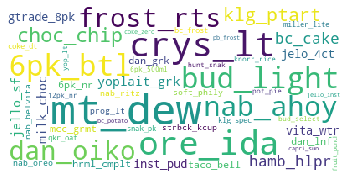

In [30]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

list_ngrams_all = result_df.ngram.values.tolist()
underlined = []
for gram in list_ngrams_all:
    new_list = gram.split(' ')
    new_word = "_".join(new_list)
    underlined.append(new_word)
text = " ".join(ngram for ngram in underlined)

wordcloud = WordCloud(max_font_size=50, 
                        background_color='white',
                        collocations=False).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Print all the popular ngrams

In [31]:
result_df_counts = result_df.groupby('ngram').max().sort_index(by=['counts'], ascending=False).drop('description', axis = 1,inplace=False)

In [32]:
answer_top50.loc['hrml cmplt']

Empty DataFrame
Columns: []
Index: [(20, HRML CMPLT CHKN&POTATO), (20, HRML CMPLT TRKY&DRESSNG), (20, HRML CMPLT MEATLOAF), (20, HRML CMPLT CHKN ALFREDO), (20, HRML CMPLT MAC&CHEESE), (20, HRML CMPLT POT ROAST), (20, HRML CMPLT BEEF TIPS), (20, HRML CMPLT SPAG& MT SC), (20, HRML CMPLT BFY MAC&CHSE), (20, HRML CMPLT SAUSGE GRAVY), (20, HRML CMPLT CKN&NOODLES), (20, HRML CMPLT NDLS&BEEF), (20, HRML CMPLT ROAST BEEF), (20, HRML CMPLT CHICKEN&RICE), (20, HRML CMPLT SCP POT&BEEF), (20, HRML CMPLT CKN&DRESSING), (20, HRML CMPLT CHSY POT&HAM), (20, HRML CMPLT CHILI W/BEAN), (20, HRML CMPLT CHKN &DMPLNG), (20, HRML CMPLT BEEF STROGNF)]

#### For our purpose, we need a further manual screening among these ngrams. This is because we can easily see that there are some ngrams do not represent a category of products. 

After manual screening, I determined:

List of product categories that are most frequently show-up in this dataset:

- ***mt dew***: Mountain Dew, a carbonated soft drink brand produced and owned by PepsiCo.
- ***crys lt***: Crystal Light is a line of powdered beverage mixes produced by Kraft Foods
- ***ore ida***: Ore-Ida is an American brand of potato-based frozen foods currently produced and distributed by Kraft Heinz's, H.J. Heinz Company Brands LLC.
- ~~6pk btl 26~~
- ***bud light***: Produced by Anheuser-Busch, the Bud Light family of products are American style light lagers.
- ***dan oiko***: Dannon® Oikos® is a brand of Greek Yogurt.
- ***nab ahoy***: Chips Ahoy! is an American cookie brand, baked and marketed by Nabisco, a subsidiary of Mondelēz International, that debuted in 1963.
- ***choc chip***: any product with choc chips in its name
- ***frost rts***: RTS frosting for cake
- ***bc cake***: Betty Crocker cake mix
- ***klg ptart***: Kellogg's Pop-tart, a brand of toaster pastries that the Kellogg Company introduced in 1964.
- ***hamb hlpr***: Hamburger Helper is a packaged food product from General Mills, sold as part of the Betty Crocker brand. 
- ***jello sf***: Jell-O Suger-free products owned by The Kraft Heinz Company
- ***milk choc***	22
- ***gtrade 8pk***: Gatorade is an American brand of sports-themed beverage and food products, built around its signature line of sports drinks.
- ***yoplait grk***: Yoplait Greek yogurt products, Yoplait is the world's largest franchise brand of yogurt. It is jointly owned by United States–based food conglomerate General Mills and French dairy cooperative Sodiaal
- ***jelo 4ct***: Jell-O 4 counts
- ***vita wtr***: VitaminWater by Coca-cola
- ***inst pud***: Jell-O product
- ***hrml cmplt***	20
- ***dan lnf***	20
- ***taco bell***	19
- ***mcc grmt***	19
- ~~6pk nr	18~~
- ***dan grk***	18
- ***coke dt***	17
- ***strbck kcup***	17
- ***soft phily***	17
- ***nab oreo***	17
- ***prog lt***	17
- ***nab ritz***	17
- ***miller lite***	17
- ***bc frost***: Betty Crocker Frosting
- ***nab belvita***	17
- ***snak pk***	16
- ***qkr oat***	16
- ~~12pk nr	16~~
- ***bud select***	16
- ***klg spec***	16
- ~~6pk 500ml	16~~
- ***hunt snak***	16
- ***knorr rice***	15
- ***pot pie***	15
- ***capri sun***	15
- ***jello inst***	15
- ***coke zero***	15
- ***fruit punch***	15
- ***yop lt***	15
- ***bc potato***	15
- ***pb frost***: Pillsbury Funfetti Frosting


At the end of this project, we found the top 50 products. In the perspective of business, we can suggest our client company increases the supply of these goods and suggest that their new-open stores can follow this pattern to secure the revenue. 